<a href="https://colab.research.google.com/github/MarceloPiemonteRibeiro/learning-Machine-learning/blob/main/SKLearn/Tree_linear_and_non_linear_algorithms(SVectMachine).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Small project about Machine learning and SKLearn

Codes from course done in [Alura](https://cursos.alura.com.br/formacao-machine-learning)

## Import libraries

In [ ]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 208 kB 5.4 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [ ]:
!pip install graphviz==0.10
!apt-get install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Example (set the scene)

Create an illustrative case to train model and set the scene. Create a sample from scratch where `porco` means pig and `cachorro` dog

In [ ]:
# features (1 sim, 0 não)
# pelo longo? 
# perna curta?
# faz auau?
porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

# 1 => porco, 0 => cachorro
dados = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
classes = [1,1,1,0,0,0]

Import SKLearn and a model example

In [ ]:

from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(dados, classes)

LinearSVC()

In [ ]:
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

LinearSVC()

Testing model with a new element `animal_misterioso` , misterious animal



In [ ]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso]) # which will return the classification of this animal_misterioso (=1, or equals cachorro)

array([0])

Test model with several new elements

In [ ]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

testes = [misterio1, misterio2, misterio3]
model.predict(testes) # predicts cachorro, porco, cachorro for the elements misterio1 to misterio3

array([0, 1, 0])

Test accuracy model. 1st manually then using SKLearn library

In [ ]:
testes_classes = [0, 1, 1]
previsoes = model.predict(testes)


In [ ]:
previsoes == testes_classes

array([ True,  True, False])

In [ ]:
corretos = (previsoes == testes_classes).sum()
total = len(testes)
taxa_de_acerto = corretos/total
print("Taxa de acerto ", taxa_de_acerto)

Taxa de acerto  0.6666666666666666


In [ ]:
print("Taxa de acerto ", taxa_de_acerto *100) # OR

Taxa de acerto  66.66666666666666


Accuracy from SKLearn

In [ ]:

from sklearn.metrics import accuracy_score

taxa_de_acerto = accuracy_score(testes_classes, previsoes)
print("Taxa de acerto", taxa_de_acerto * 100)

Taxa de acerto 66.66666666666666


#### Create functions and prepare the previous code to more data

In [ ]:
# 1 => porco, 0 => cachorro
treino_x = [porco1, porco2,  porco3, cachorro1, cachorro2, cachorro3]
treino_y = [1,1,1,0,0,0] # labels / etiquetas

from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(treino_x, treino_y)

teste_x = [misterio1, misterio2, misterio3]
teste_y = [0, 1, 1]

previsoes = model.predict(teste_x)

# accuracy rate manually
corretos = (previsoes == teste_y).sum()
total = len(teste_x)
taxa_de_acerto = corretos/total 
print("Taxa de acerto %.2f " % (taxa_de_acerto * 100))

# from SKLearn
from sklearn.metrics import accuracy_score

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print("Taxa de acerto %.2f " % (taxa_de_acerto * 100))

Taxa de acerto 66.67 
Taxa de acerto 66.67 


## Example real [data](https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv)

Import data

In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)
dados.head()

home  how_it_works  contact  bought
0     1             1        0       0
1     1             1        0       0
2     1             1        0       0
3     1             1        0       0
4     1             1        0       0

Rename columns

In [ ]:
mapa = { 
    "home" : "principal",
    "how_it_works" : "como_funciona",
    "contact" : "contato",
    "bought" : "comprou"
}
dados = dados.rename(columns = mapa)
dados.head()

principal  como_funciona  contato  comprou
0          1              1        0        0
1          1              1        0        0
2          1              1        0        0
3          1              1        0        0
4          1              1        0        0

In [ ]:
x= dados[["principal","como_funciona","contato"]]
y= dados[["comprou"]]

x.head()

principal  como_funciona  contato
0          1              1        0
1          1              1        0
2          1              1        0
3          1              1        0
4          1              1        0

In [ ]:
y.head()

comprou
0        0
1        0
2        0
3        0
4        0

Separate data for train and test. You can't use all dataset otherwise not possible to train and test.

In [ ]:
dados.shape

(99, 4)

In average 25% of your data to test the algorithm and 75% to train the data  (0.75*99 rows). We create the train and test sets and predict them using SKLearn

In [ ]:
treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]
teste_y.shape

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 75 elementos e testaremos com 24 elementos


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 95.83%


### Using the SKlearn library

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20 # set the seed to have reproducible results

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25) # split train and test with SKLearn (before we did manually)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC() # predict
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi 96.00%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train and test needs to be balance. In other words, if my set of train has much more 0s than 1s than my test, the algorithem will always predict wrong, be biased. See this is the case with our train and test y

In [ ]:
treino_y.value_counts()

comprou
0          47
1          27
dtype: int64

In [ ]:
teste_y.value_counts()

comprou
0          19
1           6
dtype: int64

Account for that in the previous code using` stratify = y`

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y) 
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi 96.00%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Same accuracy but now balance Ys

In [ ]:
treino_y.value_counts()

comprou
0          49
1          25
dtype: int64

In [ ]:
teste_y.value_counts()

comprou
0          17
1           8
dtype: int64

## Example 2 real [data](https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv)

### Import and rename data

In [ ]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

unfinished  expected_hours  price
0           1              26    192
1           1              88   9015
2           1              89   2577
3           1              42    275
4           1              39    170

In [ ]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

nao_finalizado  horas_esperadas  preco
0               1               26    192
1               1               88   9015
2               1               89   2577
3               1               42    275
4               1               39    170

In [ ]:
# create new columns and swap 0 to 1 in nao_finalizado
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

nao_finalizado  horas_esperadas  preco  finalizado
0               1               26    192           0
1               1               88   9015           0
2               1               89   2577           0
3               1               42    275           0
4               1               39    170           0

### Visualize our dataset

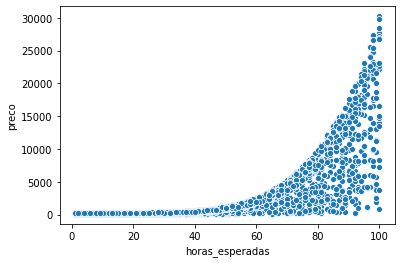

In [ ]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

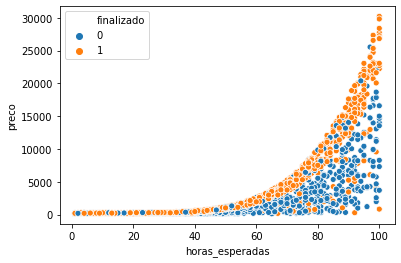

In [ ]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

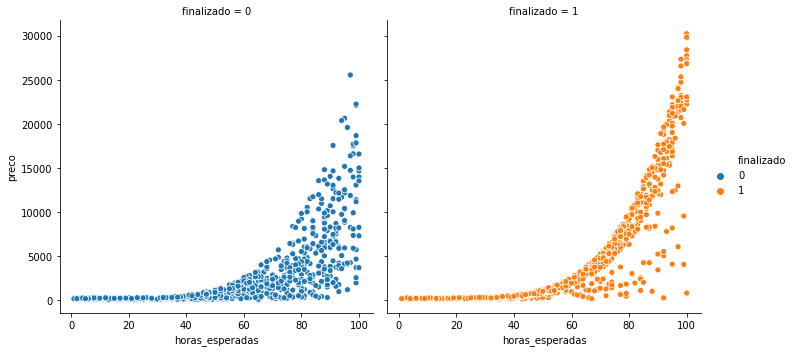

In [ ]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

Now model the data

In [ ]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC(random_state = SEED) # random_state = SEED makes sure the code is reproducible
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 47.41%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Is this accuracy good? Need to compare with a baseline

In [ ]:
previsoes_de_base = np.ones(540) # create a guess of 1 (list of 1, thus saying if I guess all elements y =1, what is this accuray? 52.59%)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritimo de baseline foi %.2f%%" % acuracia)

A acurácia do algoritimo de baseline foi 52.59%


Now lets visualize the baseline. In theory our algorithm should be able to draw the same curve of the graph below. Thus higher the price and horas, the higher tha chances to be finalizado=1.

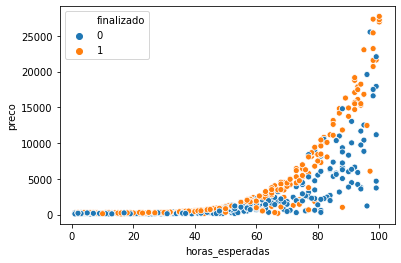

In [ ]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x) 

From texte_x we gather the min of horas_esperadas and define x_min. We do the inverse with x_max. We do the same for price using test_y.

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max) # x goes from 1 to 100 and y from 101 to 27738

1 100 101 27738


We will check the predicted points between this x and y

In [ ]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

In [ ]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

Predict all points with our model

In [ ]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

The green curve is our predictor. See how bad is the algorithem

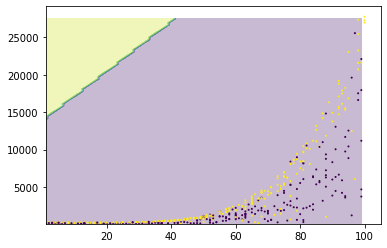

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1) 

Above we used a linear algorithm, this is why the above has a line and not a curve

OBS: SKLearn updates and seed

*   gamma='auto' is an update from the library
*   Use the numpy random seed `np.random.seed(SEED)` 



In [ ]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 49.26%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### Using a non linear predictive model

In [ ]:
from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


Visualize, see how the curve changed

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


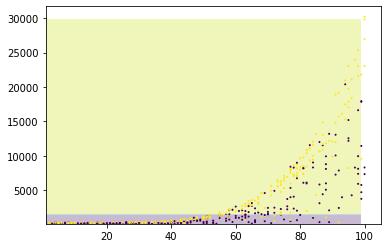

In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# DECISION BOUNDARY

Such model is sensitive to the y and x scales, so lets rescale them. The final accuracy is better but at 66.8% which is not great

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x) # based on raw treino, train my scaler
treino_x = scaler.transform(raw_treino_x) # use this scaler in my prediction
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


Visualize see now how the curve improved

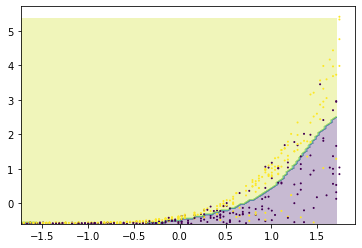

In [ ]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

## Example 3 real data - using other type of estimators

#### Import and manipulate the data

In [ ]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

Unnamed: 0  mileage_per_year  model_year      price sold
0           0             21801        2000   30941.02  yes
1           1              7843        1998   40557.96  yes
2           2              7109        2006   89627.50   no
3           3             26823        2015   95276.14   no
4           4              7935        2014  117384.68  yes

rename columns

In [ ]:
r = { 
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

Unnamed: 0  milhas_por_ano  ano_do_modelo      preco vendido
0           0           21801           2000   30941.02     yes
1           1            7843           1998   40557.96     yes
2           2            7109           2006   89627.50      no
3           3           26823           2015   95276.14      no
4           4            7935           2014  117384.68     yes

 change yes/no to 1/0

In [ ]:

a_trocar = {
    'no': 0,
    'yes': 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

Unnamed: 0  milhas_por_ano  ano_do_modelo      preco  vendido
0           0           21801           2000   30941.02        1
1           1            7843           1998   40557.96        1
2           2            7109           2006   89627.50        0
3           3           26823           2015   95276.14        0
4           4            7935           2014  117384.68        1

Create a variable indicating the cars' ages

In [ ]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

Unnamed: 0  milhas_por_ano  ano_do_modelo      preco  vendido  \
0           0           21801           2000   30941.02        1   
1           1            7843           1998   40557.96        1   
2           2            7109           2006   89627.50        0   
3           3           26823           2015   95276.14        0   
4           4            7935           2014  117384.68        1   

   idade_do_modelo  
0               22  
1               24  
2               16  
3                7  
4                8

change miles to km

In [ ]:
dados ['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

Unnamed: 0  milhas_por_ano  ano_do_modelo      preco  vendido  \
0           0           21801           2000   30941.02        1   
1           1            7843           1998   40557.96        1   
2           2            7109           2006   89627.50        0   
3           3           26823           2015   95276.14        0   
4           4            7935           2014  117384.68        1   

   idade_do_modelo   km_por_ano  
0               22  35085.22134  
1               24  12622.05362  
2               16  11440.79806  
3                7  43167.32682  
4                8  12770.11290

drop unused columns

In [ ]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)
dados.head()

preco  vendido  idade_do_modelo   km_por_ano
0   30941.02        1               22  35085.22134
1   40557.96        1               24  12622.05362
2   89627.50        0               16  11440.79806
3   95276.14        0                7  43167.32682
4  117384.68        1                8  12770.11290

### 1st prediction using SVC (support vector machine) algorithms and creating baselines

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 46.88%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Create baseline using SKLearn package - dummy classify, dummy stratify (proportional; if 30% of items are 0 e 70% 1, the estimator mantains this pattern in the classification).

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 58.00%


In [ ]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 52.44%


In [ ]:
dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 58.00%


Simplify a bit the code using `score`

In [ ]:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 58.00%


#### Non linear predictor

Much better accuracy now (at 77%)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


But this estimator is a blackbox where we do not know the decision rules.

### Decision tree classifier (not a blackbox as the previous SVC ones)

Previous estimator is a blackbox where you do not know the decision rules

1st estimation - 73% accuracy (lower than previous SVC)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 73.20%


But now you can visualize it

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None # outfile is the export
                           )
grafico = graphviz.Source(dot_data)
grafico

Rename according to variables

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True, # fill the squares and round them
                           feature_names = features # features stands for my columns from x
                          ) 
grafico = graphviz.Source(dot_data)
grafico

Car age and Kms are scaled. Remove scaler as tree map does not need it and you will have a much simpler tree. 

Also decides how many decisions the tree will employ (`max_depth`). Above several ones, lets reduce to two in order to simplify the graph, but we can set higher `max_depth`

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=2) # add max_depth  which is how many decisions the tree will take, you can increase this
modelo.fit(raw_treino_x, treino_y) # raw_treino instead of treino_x
previsoes = modelo.predict(raw_teste_x) # raw_teste instead of teste_x

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.84%


See above value means what? We are interested to know whether algorithm classifies Y/N to the car sale.

The tree says that:

*   Price< 60k classifies Yes
*   If Price >60k classifies No, if also < 24.1km becomes light orange (maybe), otherwise dark orange (so, no sale)
*   sample stands for how many data tested (starts with 7500 our set dedicated to tes). The orange and blue boxes shows how many observations were in their cases (with prices and kms < or > the given values)
*   gini means the measures used by the tree to make a new branch





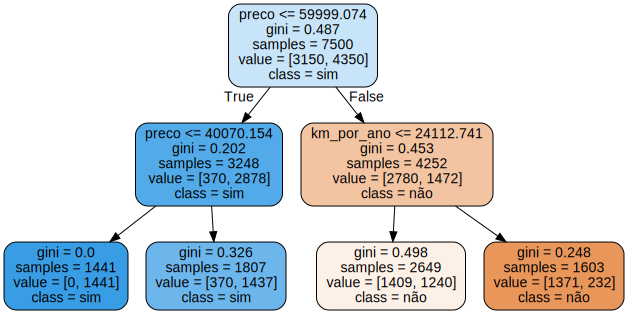

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"]) # replace by the names of our previous x dataframe Y/N
grafico = graphviz.Source(dot_data)
grafico

Increase `max_depth` to 3 - even higher accuracy

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3) # add max_depth  which is how many decisions the tree will take, you can increase this
modelo.fit(raw_treino_x, treino_y) # raw_treino instead of treino_x
previsoes = modelo.predict(raw_teste_x) # raw_teste instead of teste_x

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


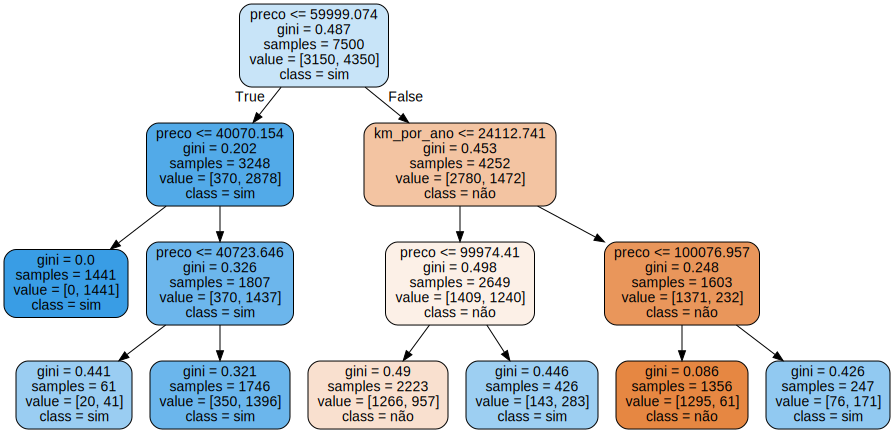

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"]) # replace by the names of our previous x dataframe Y/N
grafico = graphviz.Source(dot_data)
grafico